In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, LabelEncoder

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# 2. Read Data

In [3]:
df_wine = pd.read_csv("./winequality-white.csv",delimiter=";")

print(df_wine.shape)
df_wine.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 3. Data Analysis and Preparation

## 3.1 Understand the Dataset

In [4]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

From above we can see that we have only numerical data. i.e no categorical data

## 3.2 Summary Statistics

In [5]:
df_wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


## 3.3 Correlation Matrix

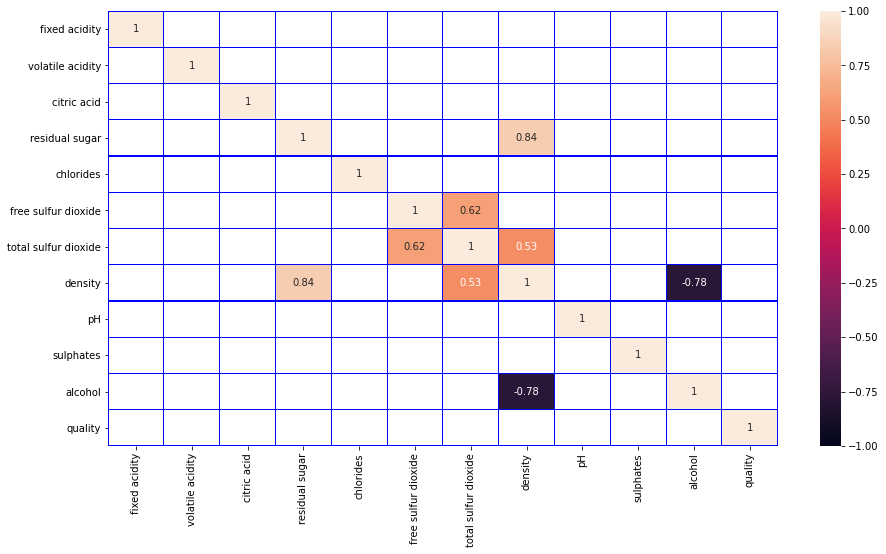

In [6]:
corr_matrix = df_wine.corr()
sns.heatmap(corr_matrix[(corr_matrix > 0.5) | (corr_matrix <= -0.5)],annot =True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.show()

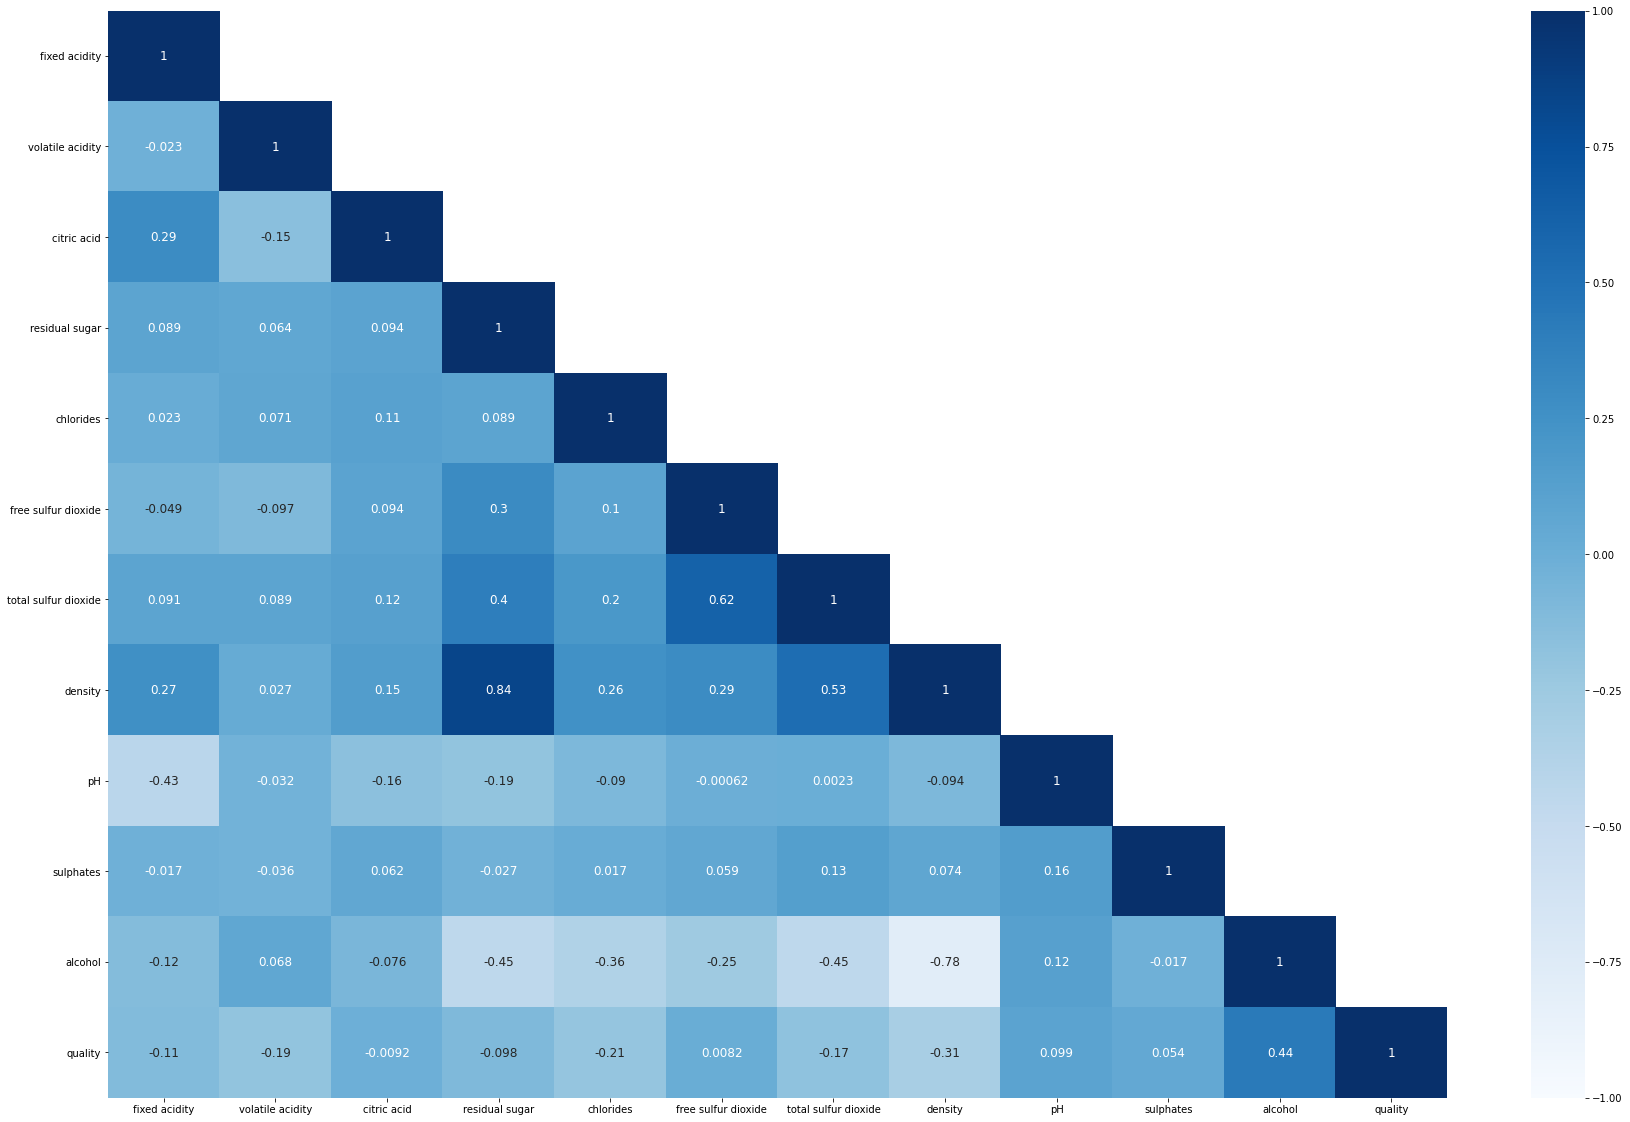

In [7]:
plt.figure(figsize = (30,20))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask,k=1)] = True

sns.heatmap(corr_matrix,cmap="Blues",vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)
plt.show()

From figure we can see that we have high correlation between `density` and `residual sugar`

## 3.4 Distribution of variables

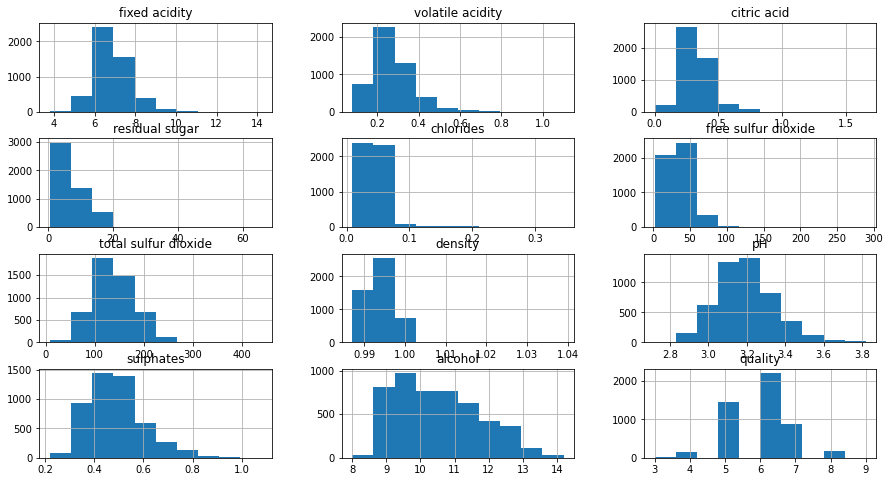

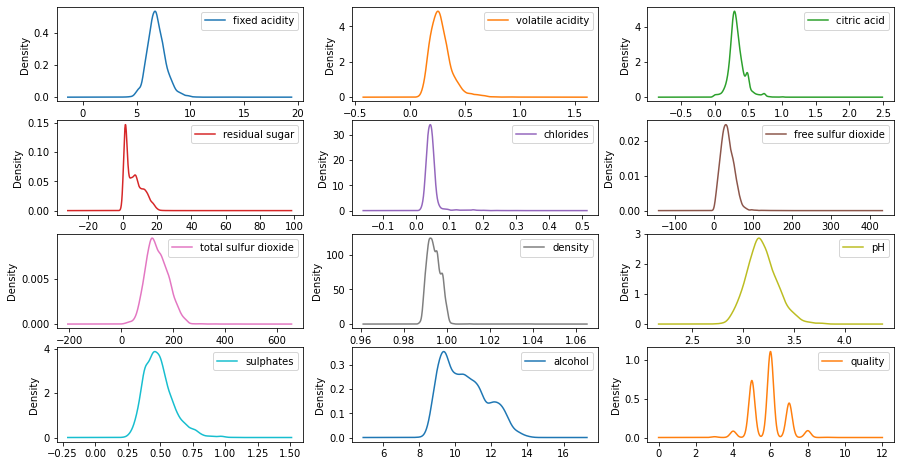

In [8]:
df_wine.hist()

# Density
df_wine.plot(kind='density', subplots=True, layout=(4,3), sharex=False)

plt.show()

## 3.5 handling Missing Values

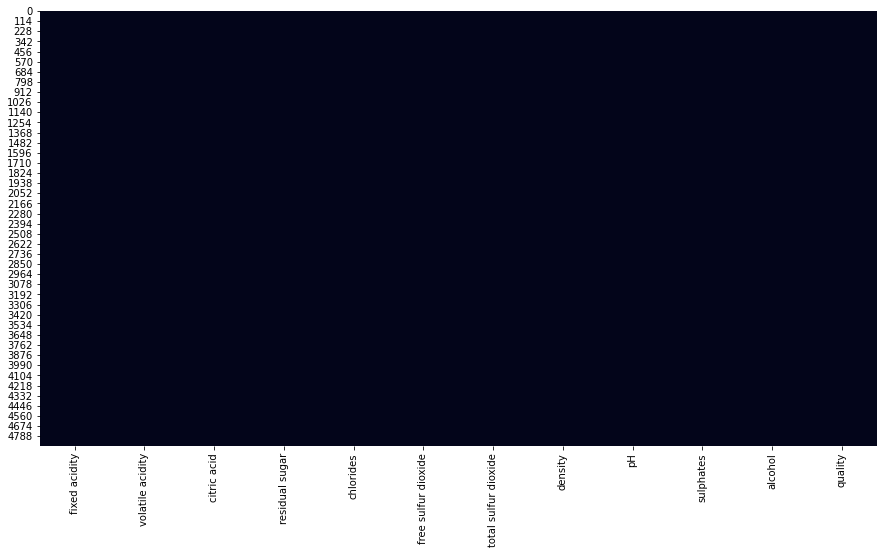

In [9]:
sns.heatmap(df_wine.isnull(),cbar=False)
plt.show()

## 3.5 Class Distribution 

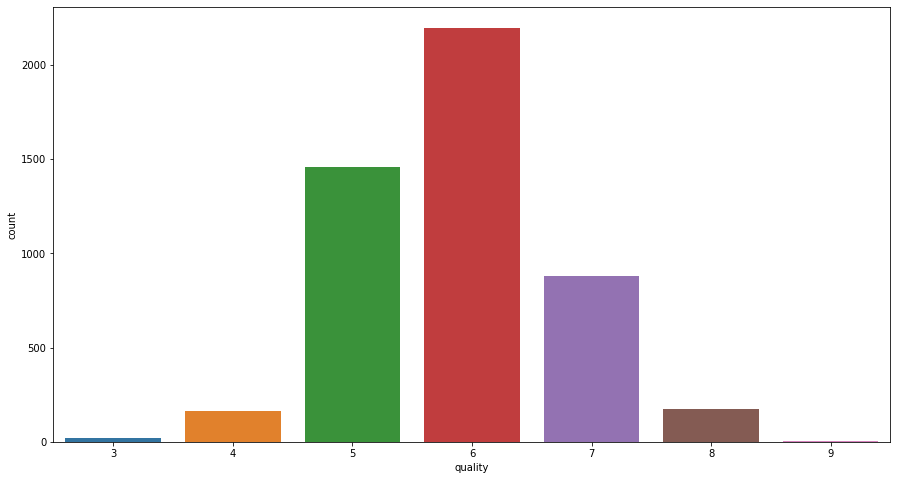

In [10]:
sns.countplot(df_wine["quality"])
plt.show()

### As seen above we have an imbalance in classes and lets handle it by upsampling

In [11]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

X = df_wine.drop(["quality"],axis=1)
Y = df_wine["quality"]

random = RandomOverSampler(random_state=0)
X_resampled, y_resampled = random.fit_resample(X,Y)

y_resampled.shape

(15386,)

<AxesSubplot:xlabel='quality', ylabel='count'>

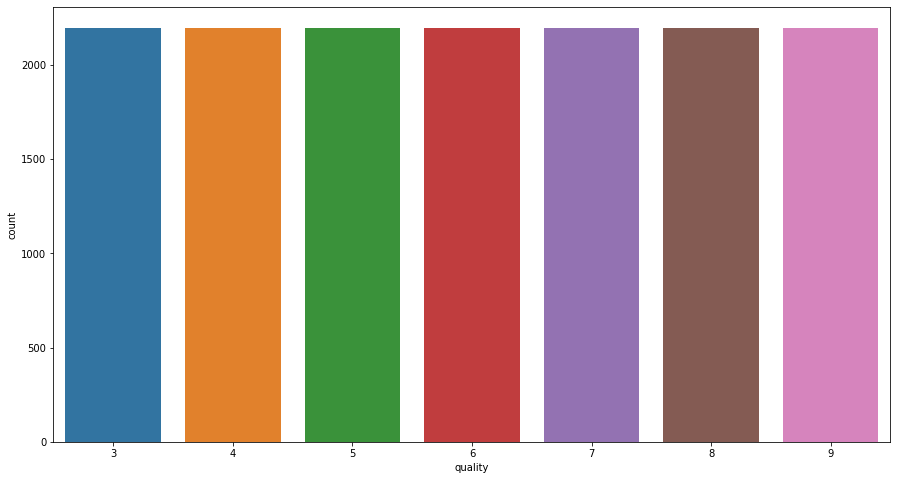

In [12]:
sns.countplot(y_resampled)

### Now convert quality to categorical for classification

In [13]:
# Check for the unique values 
y_resampled.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Lets consider the quality below 6.5 as `bad`and above 6.5 as `good`

In [14]:
bins = (2, 6.5, 9)
names = ["bad","good"]
y_resampled = pd.cut(y_resampled,bins = bins ,labels = names)
#y_resampled.head()
print(np.unique(y_resampled))

['bad' 'good']


## Now encode categorical label data to numerical data

In [15]:
labeler = LabelEncoder()
y_resampled = labeler.fit_transform(y_resampled)

print(np.unique(y_resampled),y_resampled.shape)

[0 1] (15386,)


In [16]:
X = X_resampled
Y = y_resampled

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

print("X_train",X_train.shape)
print("Y_train",Y_train.shape,np.unique(Y_train))
print("X_test",X_test.shape)
print("Y_test",Y_test.shape,np.unique(Y_test))

X_train (12308, 11)
Y_train (12308,) [0 1]
X_test (3078, 11)
Y_test (3078,) [0 1]


# 4 Training Logistic Regression Model with Upsampled Dataset

In [17]:
# Create a table for storing differemnt model learnings
cols = ['Model', "Accuracy","Log Loss"]
result_table = pd.DataFrame(columns = cols)

In [18]:
np.unique(Y_test)

array([0, 1])

## 4.1 Training Raw Data with Upsampled data set 

In [19]:

# Train the model
LogitReg = LogisticRegression()
LogitReg.fit(X_train,Y_train)

# Test the model
Y_pred = LogitReg.predict(X_test)

LogReg_Raw_Accuracy = accuracy_score(Y_pred,Y_test)
LogReg_Raw_LogLoss = log_loss(Y_pred,Y_test)

LogReg_Raw_LogLoss = pd.Series({"Model":"Raw Data as Input",
                               "Accuracy":LogReg_Raw_Accuracy,
                               "Log Loss":LogReg_Raw_LogLoss})
result_table = result_table.append(LogReg_Raw_LogLoss,ignore_index = True)
result_table

,Model,Accuracy,Log Loss
0,Raw Data as Input,0.738467,9.033146


## 4.2 Training with Scaled Data

In [20]:
X = X_resampled
Y = y_resampled

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# Train the model
LogitReg = LogisticRegression()
LogitReg.fit(X_train,Y_train)

# Test the model
Y_pred = LogitReg.predict(X_test)

LogReg_Raw_Accuracy = accuracy_score(Y_pred,Y_test)
LogReg_Raw_LogLoss = log_loss(Y_pred,Y_test)

LogReg_Raw_LogLoss = pd.Series({"Model":"Scaled Data as Input",
                               "Accuracy":LogReg_Raw_Accuracy,
                               "Log Loss":LogReg_Raw_LogLoss})
result_table = result_table.append(LogReg_Raw_LogLoss,ignore_index = True)
result_table


,Model,Accuracy,Log Loss
0,Raw Data as Input,0.738467,9.033146
1,Scaled Data as Input,0.779727,7.608041


## 4.3 Logistic Classification using SGD with Raw Data

In [21]:

X = X_resampled
Y = y_resampled

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

# Train the model
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train,Y_train)

# Test the model
Y_pred = sgd.predict(X_test)

LogReg_Raw_Accuracy = accuracy_score(Y_pred,Y_test)
LogReg_Raw_LogLoss = log_loss(Y_pred,Y_test)

LogReg_Raw_LogLoss = pd.Series({"Model":"SGD Classifier with Raw Data as Input",
                               "Accuracy":LogReg_Raw_Accuracy,
                               "Log Loss":LogReg_Raw_LogLoss})
result_table = result_table.append(LogReg_Raw_LogLoss,ignore_index = True)
result_table


,Model,Accuracy,Log Loss
0,Raw Data as Input,0.738467,9.033146
1,Scaled Data as Input,0.779727,7.608041
2,SGD Classifier with Raw Data as Input,0.715400,9.829922


## 4.4 Logistic Classification using SGD with Scaled Data

In [22]:
X = X_resampled
Y = y_resampled

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# Train the model
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train,Y_train)

# Test the model
Y_pred = sgd.predict(X_test)

LogReg_Raw_Accuracy = accuracy_score(Y_pred,Y_test)
LogReg_Raw_LogLoss = log_loss(Y_pred,Y_test)

LogReg_Raw_LogLoss = pd.Series({"Model":"SGD Classifier with scaled Data as Input",
                               "Accuracy":LogReg_Raw_Accuracy,
                               "Log Loss":LogReg_Raw_LogLoss})
result_table = result_table.append(LogReg_Raw_LogLoss,ignore_index = True)
result_table

,Model,Accuracy,Log Loss
0,Raw Data as Input,0.738467,9.033146
1,Scaled Data as Input,0.779727,7.608041
2,SGD Classifier with Raw Data as Input,0.715400,9.829922
3,SGD Classifier with scaled Data as Input,0.763158,8.180357


# 4.5 Logistic Regression with HyperParamter Tuning 

## 4.5.1 Add the Nnumber of itterations

In [23]:
X = X_resampled
Y = y_resampled

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# Train the model
LogitReg = LogisticRegression(max_iter=5000)
LogitReg.fit(X_train,Y_train)

# Test the model
Y_pred = LogitReg.predict(X_test)

LogReg_Raw_Accuracy = accuracy_score(Y_pred,Y_test)
LogReg_Raw_LogLoss = log_loss(Y_pred,Y_test)

LogReg_Raw_LogLoss = pd.Series({"Model":"Linera Regression with 5000 Itteration",
                               "Accuracy":LogReg_Raw_Accuracy,
                               "Log Loss":LogReg_Raw_LogLoss})
result_table = result_table.append(LogReg_Raw_LogLoss,ignore_index = True)
result_table

,Model,Accuracy,Log Loss
0,Raw Data as Input,0.738467,9.033146
1,Scaled Data as Input,0.779727,7.608041
2,SGD Classifier with Raw Data as Input,0.715400,9.829922
3,SGD Classifier with scaled Data as Input,0.763158,8.180357
4,Linera Regression with 5000 Itteration,0.779727,7.608041


In [24]:
X = X_resampled
Y = y_resampled

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

logModel  = LogisticRegression()


Here Create a possible paramter grid 

In [25]:
paramGrid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     "C":np.logspace(-4,4,20),
     "solver": ["lbfgs","newton-cg","liblinear","sag","saga"],
     "max_iter": [100,1000,2500,5000]
        
    }
]

Now import `GridSearchCV` model which will train the model for given data and parameter and provides best fitting parameter value

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
clf = GridSearchCV(logModel,param_grid=paramGrid,cv=3,verbose=True,n_jobs=1)

Now Fit Grid Search Model 

In [28]:
best_clf = clf.fit(X_train,Y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


Now print and check for best estimators 

In [29]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, max_iter=1000, penalty='l1',
                   solver='liblinear')

Previous Output is :
`LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')`

In [30]:
Accuracy = best_clf.score(X_test,Y_test)

In [31]:
LogReg_Raw_Accuracy = Accuracy
LogReg_Raw_LogLoss = "NA"

LogReg_Raw_LogLoss = pd.Series({"Model":"Linera Regression with Grid Search ",
                               "Accuracy":LogReg_Raw_Accuracy,
                               "Log Loss":LogReg_Raw_LogLoss})
result_table = result_table.append(LogReg_Raw_LogLoss,ignore_index = True)
result_table

,Model,Accuracy,Log Loss
0,Raw Data as Input,0.738467,9.033146
1,Scaled Data as Input,0.779727,7.608041
2,SGD Classifier with Raw Data as Input,0.715400,9.829922
3,SGD Classifier with scaled Data as Input,0.763158,8.180357
4,Linera Regression with 5000 Itteration,0.779727,7.608041
5,Linera Regression with Grid Search,0.782001,NA
